In [1]:
import math
import pandas as pd
import numpy as np
from scipy import optimize 
from sklearn.neural_network import MLPRegressor

C:\Users\pawel\AppData\Local\Temp\ipykernel_12124\3752622771.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_data["efficiencyFactor_run"] = data_ef
C:\Users\pawel\AppData\Local\Temp\ipykernel_12124\3752622771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_data["efficiencyFactor_run"].fillna(0, inplace=True)
C:\Users\pawel\AppData\Local\Temp\ipykernel_12124\3752622771.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

(0.0, 1.2)

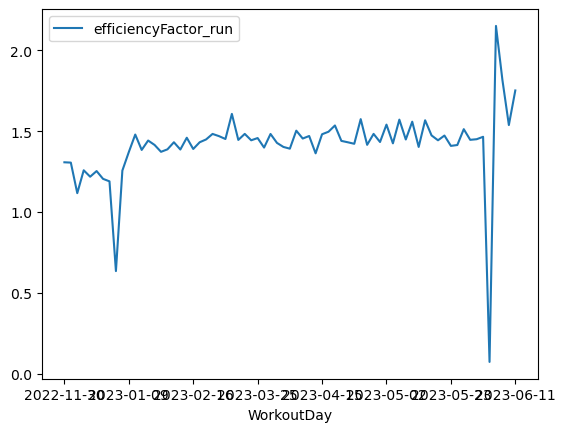

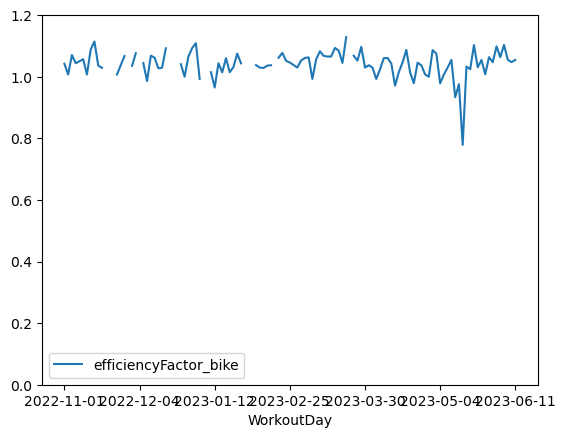

In [20]:
def efficiencyFactor(data):
    pace = data['PowerAverage'] # m/s
    hr = data['HeartRateAverage'] # bpm

    ef = pace / hr
    # print(ef)
    return ef

data = pd.read_csv('EFworkouts.csv')


run_data = data[data['WorkoutType'] == 'Run']
data_ef = efficiencyFactor(run_data)
run_data["efficiencyFactor_run"] = data_ef
run_data["efficiencyFactor_run"].fillna(0, inplace=True)
run_data['efficiencyFactor_run'].replace(0, run_data['efficiencyFactor_run'].mean())
# run_data = run_data["efficiencyFactor_run"].dropna(inplace=True)
run_data = run_data[run_data['efficiencyFactor_run'] != 0]

# data.describe()

run_data.plot(x='WorkoutDay', y='efficiencyFactor_run', kind='line')	

bike_data = data[data['WorkoutType'] == 'Bike']
data_ef = efficiencyFactor(bike_data)
bike_data["efficiencyFactor_bike"] = data_ef
bike_data['efficiencyFactor_bike'].dropna(inplace=True)
# bike_data['efficiencyFactor_bike'].fillna(0, inplace=True)
bike_data = bike_data[bike_data['efficiencyFactor_bike'] != 0]

# data.describe()

ax = bike_data.plot(x='WorkoutDay', y='efficiencyFactor_bike', kind='line')	
ax.set_ylim([0, 1.2])




    

<AxesSubplot: xlabel='WorkoutDay'>

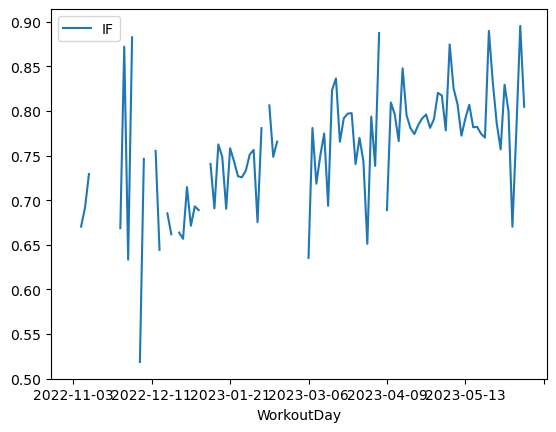

In [21]:
run_data = data[data['WorkoutType'] == 'Run']

run_data.plot(x='WorkoutDay', y='IF', kind='line')	

0.6690796987546703


C:\Users\pawel\AppData\Local\Temp\ipykernel_12124\1544419967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['WorkoutDay'] = pd.to_datetime(data['WorkoutDay'])
C:\Users\pawel\AppData\Local\Temp\ipykernel_12124\1544419967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data['rolling_average'] = bike_data['IF'].rolling('7D').mean()


Text(0.5, 1.0, 'Rolling Average of IF for Bike Workouts')

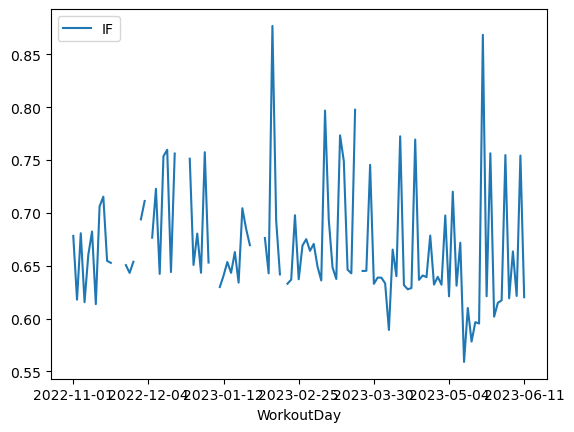

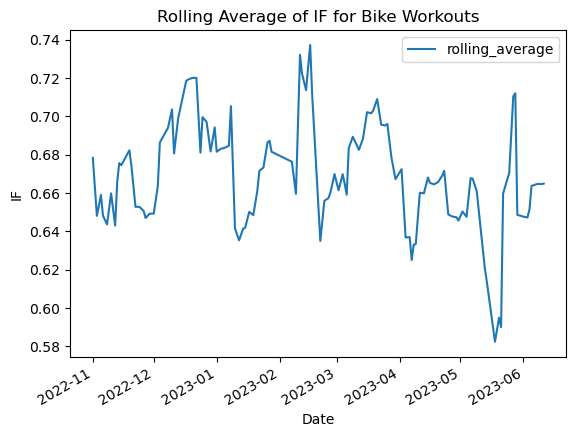

In [41]:
bike_data = data[data['WorkoutType'] == 'Bike']

ax = bike_data.plot(x='WorkoutDay', y='IF', kind='line')
print(bike_data['IF'].mean())

# get the avergage IF for each week
# get the average EF for each week
bike_data['WorkoutDay'] = pd.to_datetime(data['WorkoutDay'])
bike_data.set_index('WorkoutDay', inplace=True)
bike_data['rolling_average'] = bike_data['IF'].rolling('7D').mean()
# print(rolling_average)

ax = bike_data.plot(y='rolling_average', kind='line')
ax.set_xlabel("Date")
ax.set_ylabel("IF")
ax.set_title("Rolling Average of IF for Bike Workouts")